In [12]:
#! /usr/bin/python
from PIL import Image
from PIL.ImageChops import difference
from PIL.ImageChops import subtract
from IPython.display import display
from IPython.html.widgets import interact_manual
import os
#Created by vvdr12
#Fully open license. Have fun.
#change threshold value in 'def contrastspoints' for higher/lower line density.

#_functions______________________________________________
def japanize(filename,threshold):

    def contrastpoints(x,j,img,threshold):
        #threshold=20
        contrast=[]
        i=0
        l2=1
        while l2==1:

            r1=img[i,j][0]
            b1=img[i,j][1]
            g1=img[i,j][2]
            ave1=((r1+b1+g1)/3)

            r2=img[(i+1),j][0]
            b2=img[(i+1),j][1]
            g2=img[(i+1),j][2]
            ave2=((r2+b2+g2)/3)

            r3=img[(i+2),j][0]
            b3=img[(i+2),j][1]
            g3=img[(i+2),j][2]
            ave3=((r3+b3+g3)/3)

            r4=img[(i+3),j][0]
            b4=img[(i+3),j][1]
            g4=img[(i+3),j][2]
            ave4=((r4+b4+g4)/3)

            if abs(ave2-ave1)>threshold:
                if abs(ave1-ave3)>(threshold/2):
                    contrast.append(i)

            i=i+1
            if i==(x-3):
                l2=0
        return contrast

    #_Page_Setup____________________________________________
    source = Image.open('img/' + filename)
    img = source.load()

    x = source.size[0]
    y = source.size[1]

    #_______________________________________________________

    i=0
    j=0#set to 500 for short test run
    k=0
    l=0
    m=0 #contrast func
    l1=1
    contrast=contrastpoints(x,j,img,threshold) #contrast func
    #print "\n", j, "/", y
    while (l1==1):

        if len(contrast)>m: #contrast func
            if i>=contrast[m]:
                img[i,j]=(0,0,0)
                m=m+1

        i=i+1
        if i==(x-1):
            contrast=contrastpoints(x,j,img,threshold) #contrast func
            m=0 #contrast func
            i=0

            k=k+1
            if k==1:
                k=0

                j=j+1
                #print j, "/",y		
                if j==y: #set to 510 for short test run
                    l1=0

    t = difference(Image.open('img/' + filename), source)
    display(t)

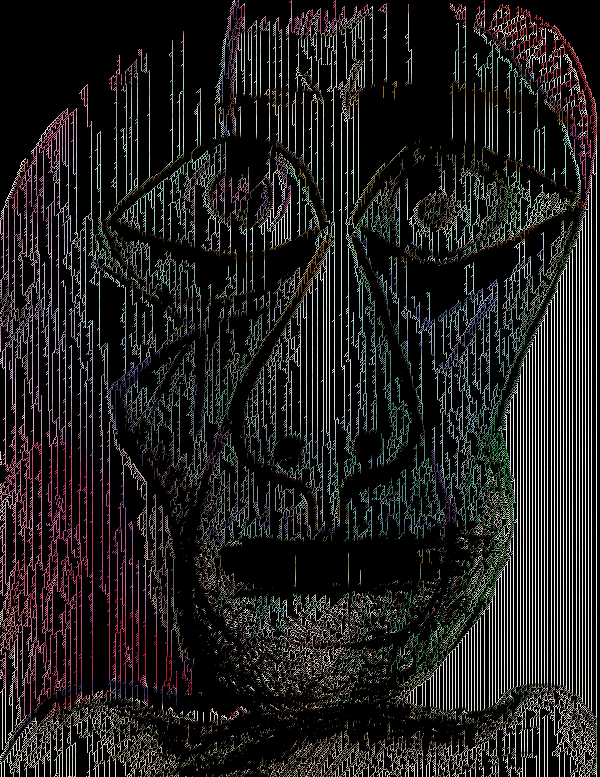

In [14]:
images = [f for f in os.listdir('img/')]
interact_manual(japanize, filename=images, threshold=(0,100))